In [278]:
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from PIL import Image
import os
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.layers. normalization import BatchNormalization
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [279]:
IMG_SIZE=150

def load_data(DIR):
    #print(DIR,category)
    data = []
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        img2 = Image.open(path)
        img2 = img2.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        data.append(np.array(img2))
                     
            
    #shuffle(train_data)
    return data

In [281]:
#cat_images=load_data("./Cat2")
#dog_images=load_data("./Dog2")

#catImages = np.array(cat_images).reshape(len(cat_images), IMG_SIZE, IMG_SIZE, 3)
#dogImages = np.array(dog_images).reshape(len(dog_images), IMG_SIZE, IMG_SIZE, 3)
#rint(catImages.shape,dogImages.shape)



In [282]:
#data_images=np.concatenate((cat_images,dog_images),axis=0)
#labels=np.concatenate(([0 for i in range(len(cat_images))],[1 for i in range(len(dog_images))]),axis=0)


In [287]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

print("rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures\n")
print("width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally\n")
print("rescale is a value by which we will multiply the data before any other processing. Our original images \n")
print("consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.\n")
print("shear_range is for randomly applying shearing transformations\n")
print("zoom_range is for randomly zooming inside pictures\n")
print("horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).\n")
print("fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.\n")

train_generator=data_datagen.flow_from_directory("./data/train",target_size=(150,150),batch_size=20,class_mode='binary'
)

count=0
for data_batch, labels_batch in train_generator:
    print(count,data_batch.shape,labels_batch.shape)
    count+=1
    break

rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures

width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

rescale is a value by which we will multiply the data before any other processing. Our original images 

consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

shear_range is for randomly applying shearing transformations

zoom_range is for randomly zooming inside pictures

horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).

fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Found 18766 images belo

In [288]:
model=Sequential()

model.add(Conv2D(32, (3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
#model.add(Dropout(0.25))
model.add(MaxPooling2D(2))

#model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics = ['acc'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_159 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_157 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_158 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_159 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 15, 15, 128)     

In [290]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3)
#history=model.fit(data_images, labels, callbacks=[early_stopping_monitor], validation_split=.2, batch_size = 64, epochs = 5, verbose = 1)
history=model.fit_generator(train_generator, callbacks=[early_stopping_monitor], steps_per_epoch=2000, epochs =3, verbose = 1)

Epoch 1/3
2000/2000 [==============================] - 2072s 1s/step - loss: 0.5830 - acc: 0.7026
Epoch 2/3
2000/2000 [==============================] - 1965s 983ms/step - loss: 0.5179 - acc: 0.7482
Epoch 3/3
2000/2000 [==============================] - 2044s 1s/step - loss: 0.4813 - acc: 0.7734


In [291]:
#loss, acc = model.evaluate(data_images, labels, verbose = 1)
#print(acc*100)

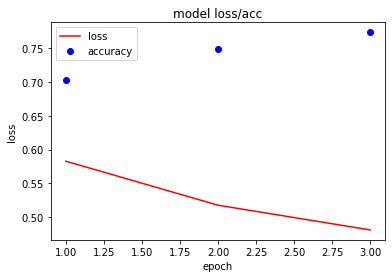

In [292]:
hist_dict=history.history
epochs=range(1,len(hist_dict['loss'])+1)
#print(hist_dict)
plt.plot(epochs,hist_dict['loss'],'b',label='loss',c='red')
plt.plot(epochs,hist_dict['acc'],'bo',label='accuracy',c='blue')

plt.title('model loss/acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [300]:
IMG_SIZE=150
path=r"C:\Users\dnishimoto.BOISE\data\test\120.jpg"
img2 = Image.open(path)
dog_image=img2.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
dog_image=np.array(dog_image).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict(dog_image)
print("Dog",prediction)
path=r"C:\Users\dnishimoto.BOISE\data\test\test_cat.jpg"
img2 = Image.open(path)
cat_image=img2.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
cat_image=np.array(cat_image).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
prediction=model.predict(cat_image)
print("Cat",prediction)


Dog [[1.]]
Cat [[0.]]
